   Age  Year  Nodes  Survival
0   68    68      7         2
1   58    63     13         1
2   44    65     15         1
3   72    66     13         2
4   37    61     11         2
Age         0
Year        0
Nodes       0
Survival    0
dtype: int64
              Age        Year       Nodes    Survival
count  200.000000  200.000000  200.000000  200.000000
mean    54.260000   62.425000   15.360000    1.370000
std     14.229716    3.216536    9.098037    0.484016
min     30.000000   58.000000    0.000000    1.000000
25%     42.000000   60.000000    7.000000    1.000000
50%     55.000000   62.000000   16.000000    1.000000
75%     67.250000   65.000000   23.250000    2.000000
max     79.000000   68.000000   29.000000    2.000000


C:\Users\ch\anaconda3\envs\tokyo\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ch\anaconda3\envs\tokyo\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ch\anaconda3\envs\tokyo\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ch\anaconda3\envs\tokyo\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

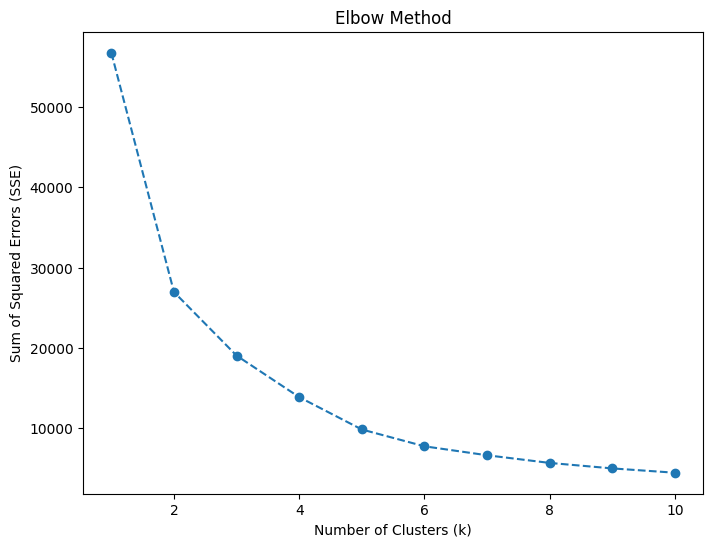

C:\Users\ch\anaconda3\envs\tokyo\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


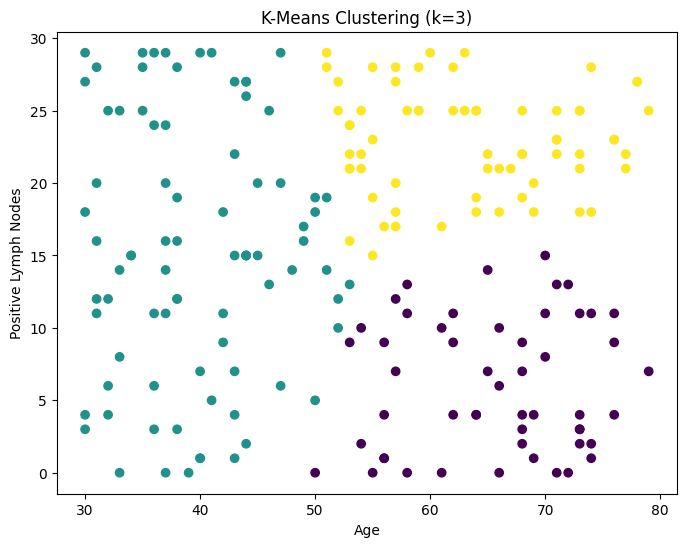

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Haberman dataset
data = pd.read_csv("haberman_survival.csv")

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

#Feature Selection
X = data[['Age', 'Nodes']]

sse = []  # Sum of squared errors

# Try different values of k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

# Choose the optimal value of k (e.g., 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['Age'], X['Nodes'], c=data['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Positive Lymph Nodes')
plt.title(f'K-Means Clustering (k={k})')
plt.show()